# This notebook contains the script needed for generating visual graphics about task 1's data.

### frequent itemset

In [1]:
TEXT 	= 'TEXT'
INTEGER = 'INTEGER (LONG)'
REAL 	= 'REAL'
DATE 	= 'DATE/TIME'

In [2]:
class Stat:
	def __init__(self, name):
		self.dataset 	= name
		self.textCount 	= 0
		self.textCols 	= []
		self.intCount 	= 0
		self.intCols 	= []
		self.dateCount 	= 0
		self.dateCols 	= []
		self.realCount 	= 0
		self.realCols 	= []
	def add(self, t, col):
		if t == TEXT:
			self.textCount += 1
			self.textCols.append(col)
		elif t == INTEGER:
			self.intCount += 1
			self.intCols.append(col)
		elif t == REAL:
			self.realCount += 1
			self.realCols.append(col)
		elif t == DATE:
			self.dateCount += 1
			self.dateCols.append(col)
	def get_stats(self):
		return {
			TEXT: 		self.textCount,
			INTEGER: 	self.intCount,
			REAL: 		self.realCount,
			DATE: 		self.dateCount
		}

	def get_2_itemset(self):
		result = {
			TEXT + ';' + INTEGER: 0,
			TEXT + ';' + REAL: 	0,
			TEXT + ';' + DATE: 	0,
			INTEGER + ';' + REAL: 0,
			INTEGER + ';' + DATE: 0,
			REAL + ';' + DATE: 	0
		}

		t = {col for col in self.textCols}
		i = {col for col in self.intCols}
		r = {col for col in self.realCols}
		d = {col for col in self.dateCols}
		
		for col in t:
			if col in i: result[TEXT + ';' + INTEGER] += 1
			if col in r: result[TEXT + ';' + REAL] += 1
			if col in d: result[TEXT + ';' + DATE] += 1

		for col in i:
			if col in r: result[INTEGER + ';' + REAL] += 1
			if col in d: result[INTEGER + ';' + DATE] += 1

		for col in r:
			if col in d: result[REAL + ';' + DATE] += 1

		return result

	def get_3_itemset(self):
		result = {
			TEXT + ';' + INTEGER + ';' + REAL: 	0,
			TEXT + ';' + REAL + ';' + DATE: 	0,
			TEXT + ';' + INTEGER  + ';' + DATE: 0,
			INTEGER + ';' + REAL + ';' + DATE: 	0
		}
		t = {col for col in self.textCols}
		i = {col for col in self.intCols}
		r = {col for col in self.realCols}
		d = {col for col in self.dateCols}

		for col in t:
			if col in i and col in r: result[TEXT + ';' + INTEGER + ';' + REAL] += 1
			if col in r and col in d: result[TEXT + ';' + REAL + ';' + DATE] += 1
			if col in i and col in d: result[TEXT + ';' + INTEGER  + ';' + DATE] += 1
		for col in i:
			if col in r and col in d: result[INTEGER + ';' + REAL + ';' + DATE] += 1

		return result

	def get_4_itemset(self):
		result = {
			TEXT + ';' + INTEGER + ';' + REAL + ';' + DATE: 	0,
		}
		t = {col for col in self.textCols}
		i = {col for col in self.intCols}
		r = {col for col in self.realCols}
		d = {col for col in self.dateCols}

		for col in t:
			if col in i and col in r and col in d: result[TEXT + ';' + INTEGER + ';' + REAL + ';' + DATE] += 1

		return result

class State:
	def __init__(self):
		self.datasets = []

	def add_dataset(self, dataset):
		self.datasets.append(dataset)

	def get_stats(self):
		stats = {
			TEXT: 		0,
			INTEGER: 	0,
			REAL: 		0,
			DATE: 		0
		}
		for dataset in self.datasets:
			stat = dataset.get_stats()
			stats[TEXT] += stat[TEXT]
			stats[INTEGER] += stat[INTEGER]
			stats[REAL] += stat[REAL]
			stats[DATE] += stat[DATE]

		return stats

	def get_2_itemset(self):
		stats = {
			TEXT + ';' + INTEGER: 0,
			TEXT + ';' + REAL: 	0,
			TEXT + ';' + DATE: 	0,
			INTEGER + ';' + REAL: 0,
			INTEGER + ';' + DATE: 0,
			REAL + ';' + DATE: 	0
		}

		for dataset in self.datasets:
			stat = dataset.get_2_itemset()
			stats[TEXT + ';' + INTEGER] += stat[TEXT + ';' + INTEGER]
			stats[TEXT + ';' + REAL] += stat[TEXT + ';' + REAL]
			stats[TEXT + ';' + DATE] += stat[TEXT + ';' + DATE]
			stats[INTEGER + ';' + REAL] += stat[INTEGER + ';' + REAL]
			stats[INTEGER + ';' + DATE] += stat[INTEGER + ';' + DATE]
			stats[REAL + ';' + DATE] += stat[REAL + ';' + DATE]

		return stats

	def get_3_itemset(self):
		stats = {
			TEXT + ';' + INTEGER + ';' + REAL: 	0,
			TEXT + ';' + REAL + ';' + DATE: 	0,
			TEXT + ';' + INTEGER  + ';' + DATE: 0,
			INTEGER + ';' + REAL + ';' + DATE: 	0
		}

		for dataset in self.datasets:
			stat = dataset.get_3_itemset()
			stats[TEXT + ';' + INTEGER + ';' + REAL] += stat[TEXT + ';' + INTEGER + ';' + REAL]
			stats[TEXT + ';' + REAL + ';' + DATE] += stat[TEXT + ';' + REAL + ';' + DATE]
			stats[TEXT + ';' + INTEGER  + ';' + DATE] += stat[TEXT + ';' + INTEGER  + ';' + DATE]
			stats[INTEGER + ';' + REAL + ';' + DATE] += stat[INTEGER + ';' + REAL + ';' + DATE]

		return stats

	def get_4_itemset(self):
		stats = {
			TEXT + ';' + INTEGER + ';' + REAL + ';' + DATE: 0
		}
		for dataset in self.datasets:
			stat = dataset.get_4_itemset()
			stats[TEXT + ';' + INTEGER + ';' + REAL + ';' + DATE] += stat[TEXT + ';' + INTEGER + ';' + REAL + ';' + DATE]

		return stats



### Read the data from raw input generated by task1.py

In [3]:
import os
import simplejson as json

directory_in_str = '../raw_output'
directory = os.fsencode(directory_in_str)

In [4]:
datasets = []

state = State()

none_col = 0
none_being_most = 0
total_col = 0
number_column_types = [0, 0, 0, 0]
column_name_length = {}
times = []
longest_file = ''
longest_elapsed = 0
key_column_candidates_count = 0

max_int = 0
min_int = 10000000
max_date = None
min_date = None
dates = []
max_real = 0
min_real = 10000000
longest_5_string = []
int_mean = []
real_mean = []
int_std = []
real_std = []
avg_length = []

print('start gathering data')
for file in os.listdir(directory):
	filename = os.fsdecode(file)
	if filename.endswith(".json"):
		with open(directory_in_str + '/' + filename) as f:
			obj = json.load(f)

			timing = int(obj['time_elapsed'])
			if timing > longest_elapsed:
				longest_elapsed = timing
				longest_file = filename
			times.append(timing)
			# for each type, how many columns contain that type
			dataset = Stat(filename.split('.')[0])

			for col in obj['columns']:
				if len(obj['columns'][col]['column_name']) not in column_name_length:
					column_name_length[len(obj['columns'][col]['column_name'])] = [1, [obj['columns'][col]['column_name']]]
				else:
					column_name_length[len(obj['columns'][col]['column_name'])][0] += 1
					column_name_length[len(obj['columns'][col]['column_name'])][1].append(obj['columns'][col]['column_name'])
				for t in obj['columns'][col]['data_types']:
					dataset.add(t['type'], col)

					if t['type'] == INTEGER:
						if t['max_value'] > max_int: max_int = t['max_value']
						if t['min_value'] < min_int: min_int = t['min_value']
						int_mean.append(t['mean'])
						int_std.append(t['stddev'])
					elif t['type'] == REAL:
						if t['max_value'] > max_real: max_real = t['max_value']
						if t['min_value'] < min_real: min_real = t['min_value']
						real_mean.append(t['mean'])
						real_std.append(t['stddev'])
					elif t['type'] == DATE:
						dates.append(t['max_value'])
						dates.append(t['min_value'])
					elif t['type'] == TEXT:
						longest_5_string += t['longest_values']
						longest_5_string.sort(reverse=True, key=lambda x: len(x))
						longest_5_string = longest_5_string[:5]
						avg_length.append(t['average_length'])

				number_column_types[len(obj['columns'][col]['data_types']) - 1] += 1
				if None in obj['columns'][col]['frequent_values']:
					if obj['columns'][col]['frequent_values'][0] == None:
						none_being_most += 1
					none_col += 1
				total_col += 1

			if len(obj['key_column_candidates']) != 0:
				key_column_candidates_count += 1
			state.add_dataset(dataset)

print('finished')


start gathering data
finished


In [5]:
print('finish beautified')
print('calculating frequent itemsets...')
print('frequent 1 itemsets')
print(state.get_stats())
print('frequent 2 itemsets')
print(state.get_2_itemset())
print('frequent 3 itemsets')
print(state.get_3_itemset())
print('frequent 4 itemsets')
print(state.get_4_itemset())

print("NULL # cols being most frequent value:", none_being_most)
print("NULL # cols has None as frequent value:",none_col)
print("total # cols:", total_col)
print("number of columns per number of data types that one column has\n", number_column_types)

times.sort()
starting_time = times[0]
window = 50
count = 0
d = {}

for i in range(len(times)):
	curr_time = times[i]
	if curr_time - starting_time <= window:
		count += 1
	else:
		d[starting_time] = count
		starting_time = curr_time
		count = 1

print(d)

count_min = [0] * (60)
count_hour = [0] * 9
i = 0

for m in range(len(count_min)):
	start_min = m * 60
	end_min = m * 60 + 60
	while i < len(times):
		if start_min <= times[i] <= end_min:
			count_min[m] += 1
			i += 1
		else:
			break
i = 0
count_hour = [0] * 15
for h in range(len(count_hour)):
	start_hour = h * 60 * 60
	end_hour = (h + 1) * 60 * 60

	while i < len(times):
		if start_hour <= times[i] <= end_hour:
			count_hour[h] += 1
			i += 1
		else:
			break

print("longest time elapsed", longest_elapsed, filename)
print("key column candidate count", key_column_candidates_count)

max_length = max([key for key in column_name_length])
print("max column name length:", max_length, column_name_length[max_length])

print("global max int:", max_int)
print("global min int:", min_int)
print("global max real:", max_real)
print("global min real:", min_real)
print("length of the longest 5 strings", [len(i) for i in longest_5_string])

finish beautified
calculating frequent itemsets...
frequent 1 itemsets
{'TEXT': 19934, 'INTEGER (LONG)': 21711, 'REAL': 1722, 'DATE/TIME': 4008}
frequent 2 itemsets
{'TEXT;INTEGER (LONG)': 6358, 'TEXT;REAL': 1713, 'TEXT;DATE/TIME': 2638, 'INTEGER (LONG);REAL': 914, 'INTEGER (LONG);DATE/TIME': 1365, 'REAL;DATE/TIME': 442}
frequent 3 itemsets
{'TEXT;INTEGER (LONG);REAL': 909, 'TEXT;REAL;DATE/TIME': 433, 'TEXT;INTEGER (LONG);DATE/TIME': 1268, 'INTEGER (LONG);REAL;DATE/TIME': 358}
frequent 4 itemsets
{'TEXT;INTEGER (LONG);REAL;DATE/TIME': 353}
NULL # cols being most frequent value: 10598
NULL # cols has None as frequent value: 13127
total # cols: 38375
number of columns per number of data types that one column has
 [28007, 6644, 1556, 2168]
{10: 207, 61: 334, 112: 241, 163: 182, 214: 213, 265: 117, 317: 72, 368: 81, 419: 51, 472: 35, 524: 41, 575: 37, 627: 20, 679: 10, 731: 17, 782: 19, 833: 11, 885: 9, 942: 8, 993: 13, 1051: 7, 1107: 5, 1175: 5, 1239: 4, 1293: 2, 1367: 2, 1429: 3, 1481: 2

# Graph 1 - Time elapsed

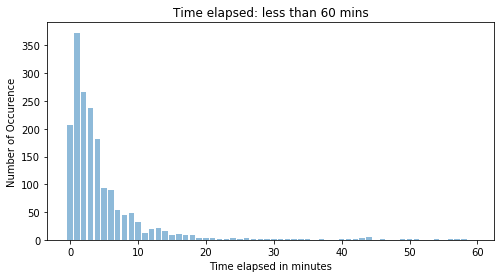

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

x = np.array(count_min)
# x = x[:60] + [sum(x[60:120]), sum(x[120:180]), sum(x[180:240]), sum(x[240:300]), sum(x[300:])]
# objects = tuple([str(i) + 'm' for i in range(1, 61)] + ['1-2h', '2-3h', '3-4h', '4-5h', '5h+'])
objects = tuple(['' for i in range(len(x))])
y_pos = np.arange(len(objects))

plt.bar(y_pos, x, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurence')
plt.xlabel('Time elapsed in minutes')
plt.title('Time elapsed: less than 60 mins')

plt.show()

In [7]:
count_hour[0] / sum(count_hour)

0.9455026455026455

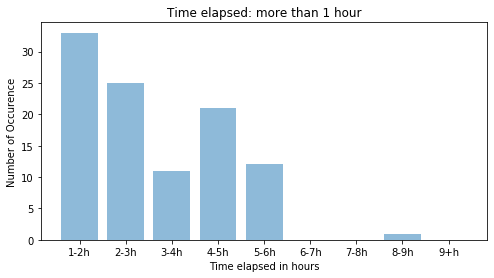

In [8]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
x = np.array(count_hour[1:10])
# x = x[:60] + [sum(x[60:120]), sum(x[120:180]), sum(x[180:240]), sum(x[240:300]), sum(x[300:])]
# objects = tuple([str(i) + 'm' for i in range(1, 61)] + ['1-2h', '2-3h', '3-4h', '4-5h', '5h+'])
objects = tuple(['' for i in range(len(x))])
y_pos = np.arange(len(objects))

plt.bar(y_pos, x, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurence')
plt.xlabel('Time elapsed in hours')
plt.title('Time elapsed: more than 1 hour')
plt.xticks(np.arange(len(objects)),['1-2h', '2-3h','3-4h','4-5h','5-6h','6-7h','7-8h','8-9h','9+h'])

plt.show()

# Graph 2 - Int mean distribution

largest occurence: 1043
The mean with the largest occurence: 24.45762711864407
the largest mean: 7.5e+100


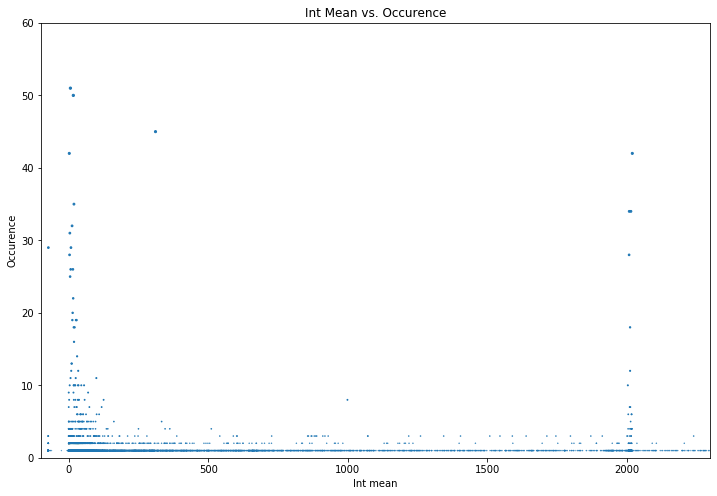

In [9]:
x = np.array(int_mean)
val, y  = np.unique(x, return_counts=True) # counting occurrence of each loan

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(-100, 2300)
plt.ylim(0, 60)
plt.xlabel("Int mean")
plt.ylabel("Occurence")
plt.title("Int Mean vs. Occurence")
plt.scatter(val,y, s=0.1 * y)

print("largest occurence:", np.max(y))
print("The mean with the largest occurence:", x[np.argmax(y)])
print("the largest mean:", np.max(x))

# Graph 3 - Int STD distribution

largest occurence: 2595
The std with the largest occurence: 44.7666046461504
The largest std: 5.000000000000001e+100


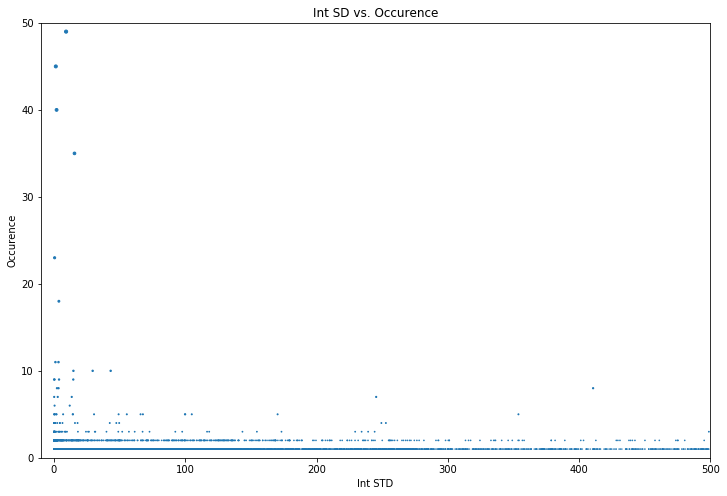

In [10]:
x = []
for i in int_std:
    try:
        x.append(float(i))
    except Exception:
        pass
    finally:
        pass

x = np.array(x)

val, y  = np.unique(x, return_counts=True) # counting occurrence of each loan

plt.xlabel("Int STD")
plt.ylabel("Occurence")
plt.title("Int SD vs. Occurence")
plt.xlim(-10,500)
plt.ylim(0,50)
plt.scatter(val,y, s=y/5)

print("largest occurence:", np.max(y))
print("The std with the largest occurence:", x[np.argmax(y)])
print("The largest std:", max(x))

# Graph 4 - Average Text Length

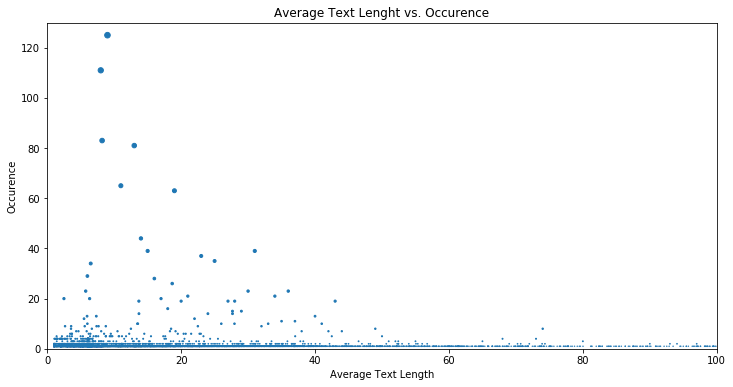

In [11]:
x = avg_length
val, y  = np.unique(np.array(x), return_counts=True) # counting occurrence of each loan

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0, 100)
plt.ylim(0, 130)
plt.xlabel("Average Text Length")
plt.ylabel("Occurence")
plt.title("Average Text Lenght vs. Occurence")
plt.scatter(val,y, s = y/4)

In [12]:
print("greatest occurence:", val[np.argmax(y)])
print("text length with the largest occurence", np.max(y))
print("longest length:", np.max(val))

greatest occurence: 1.0
text length with the largest occurence 4311
longest length: 8361.518072289156


# Graph 5 - Dates

In [13]:
from dateutil.parser import parse
import pytz
x = dates

parsed_dates = []
for i in x:
    try:
        parsed_dates.append(parse(i, fuzzy=True))
    except Exception:
        pass
    finally:
        pass

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname LLC identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname ADMIN identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname X identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.


In [14]:
for i in range(len(parsed_dates)):
    if parsed_dates[i].tzinfo is None:
        parsed_dates[i] = pytz.utc.localize(parsed_dates[i])
parsed_dates.sort()

In [15]:
print("earliest date, longest data")
print(parsed_dates[0], parsed_dates[-1])

earliest date, longest data
0001-01-01 00:00:00+00:00 9999-12-31 00:00:00+00:00


In [16]:
val, y  = np.unique(np.array([str(i) for i in parsed_dates]), return_counts=True) # counting occurrence of each loan

In [17]:
import datetime
summary = [(parsed_dates[i], y[i]) for i in range(len(y)) if y[i] > 0 and parsed_dates[i] > pytz.utc.localize(datetime.datetime(year=2008, month=1,day=1))]

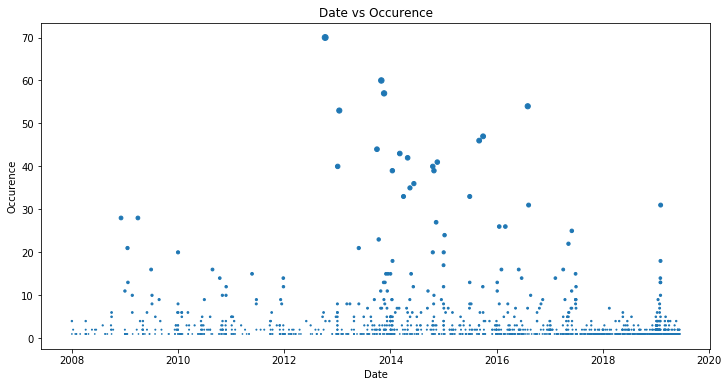

In [18]:
val = np.array([i[0] for i in summary])
dates = np.array([i[1] for i in summary])
plt.xlabel("Date")
plt.ylabel("Occurence")
plt.title("Date vs Occurence")
plt.scatter(val,dates, s = dates * 0.5)

### More graphs about stddev can be generated. But I think that would be too redundant.